In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy import stats
from plot_sklearn_dendrogram import plot_sklearn_dendrogram # local python file to view dendrogram
%matplotlib inline
np.random.seed(10)
random.seed(10)

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
dff = df.drop(['species'],axis=1) # get only the features in the dataframe

In [5]:
#agc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
#agc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
agc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
agc.fit(dff)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func=<function mean at 0x10a420410>)

In [6]:
dffdv = dff.values # get the data matrix of values (dataframe feature data values)
print(dffdv.dtype)



float64


In [7]:
#OTHER
#dfdv = df.values # get the data matrix of values including the last one that contains strings
#print(dv.dtype) # type is no longer numeric because of column "species"

In [8]:
clusters = agc.labels_

In [9]:
print(type(clusters))
print(clusters)
print(clusters.shape)
clusterLabels = map(str,sorted(set(clusters.tolist())))
print(clusterLabels)

<type 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(150,)
['0', '1', '2']


In [10]:
classes = df.loc[:,"species"]
classLabels = df.species.unique().tolist()
print(classLabels)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [11]:
type(classes)

pandas.core.series.Series

In [12]:
classes.tail()

145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, dtype: object

In [13]:
allLabels = classLabels + clusterLabels
cm = metrics.confusion_matrix(classes, clusters.astype(str), labels=allLabels)
cm.shape

(6, 6)

In [14]:
cm

array([[ 0,  0,  0,  0, 50,  0],
       [ 0,  0,  0, 50,  0,  0],
       [ 0,  0,  0, 14,  0, 36],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

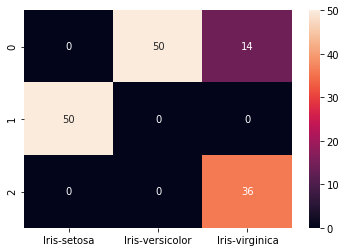

In [15]:
cmdf = pds.DataFrame(data=cm, copy=True, index=allLabels, columns=allLabels).loc[classLabels, clusterLabels]
cmdf = cmdf.transpose()
sns.heatmap(cmdf, annot=True)

In [16]:
metrics.silhouette_score(dffdv, clusters, metric='euclidean', sample_size=None) # sample_size=None for no sampling 

0.5541608580282856

In [17]:
proba = cmdf.values/cmdf.values.sum(axis=1, keepdims=True) # divide each element of a row by the sum of the row
print(proba)
entropy = [stats.entropy(row, base=2) for row in proba]
print "entropy of each cluster:", entropy

[[0.      0.78125 0.21875]
 [1.      0.      0.     ]
 [0.      0.      1.     ]]
entropy of each cluster: [0.7578784625383954, 0.0, 0.0]


In [18]:
metrics.normalized_mutual_info_score(classes, clusters)

0.8057536711305504

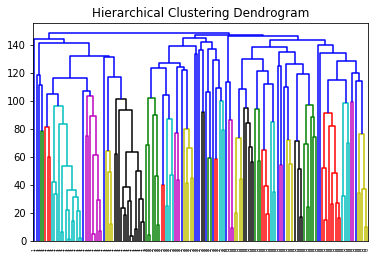

In [19]:
plt.title('Hierarchical Clustering Dendrogram')
plot_sklearn_dendrogram(agc, labels=agc.labels_)
plt.show()

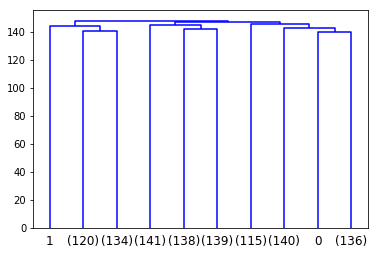

In [20]:
plot_sklearn_dendrogram(agc, labels=agc.labels_, truncate_mode='lastp', p=10)